# **Phase 3 - Inference**

**Team 03:**

- Bruno Fernandes, up202108871
- Hugo Abelheira, up202409899
- Luís Pereira, up200502498

## **Table of Contents**

* [Introduction](#intro)
    * [Phase 1 Summary](#p1summary)
    * [Report Overview](#report)
    * [Overview of Methodology](#overview)
* [Statistical Modelling](#modelling)
    * [Critique & Limitations](#limits)
* [Summary & Conclusions](#end)
    * [Project Summary](#whatwedid)
    * [Summary of Findings](#summary)
    * [Conclusion](#conclusion)

## **Introduction** <a class="anchor" id="intro"></a>

### **Phase 1 Summary** <a class="anchor" id="p1summary"></a>

### **Report Overview** <a class="anchor" id="report"></a>

### **Overview of Methodology** <a class="anchor" id="overview"></a>

## **Statistical Modelling** <a class="anchor" id="modelling"></a>

### **Critique & Limitations** <a class="anchor" id="limits"></a>
vantagens e desvantangens do método escolhido para retirar as inferências

## **Summary & Conclusions** <a class="anchor" id="end"></a>

### **Project Summary** <a class="anchor" id="whatwedid"></a>
resumidamente o que fizemos na fase 1 e na fase 2
### **Summary of Findings** <a class="anchor" id="summary"></a>
resumidamente, o que descobrimos sobre o nosso problema
### **Conclusion** <a class="anchor" id="conclusion"></a>
conclusoes sobre o nosso problema e como se relacionam ao nosso objetivo

In [1]:
# load the dataset
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

,Ano,AreaTotal_ha,Duracao_Horas,Distrito,Concelho,TypeArea
0,2011,0.0100,0.733333,Porto,Penafiel,Forest
1,2011,0.0050,0.783333,Porto,Vila Nova de Gaia,Forest
2,2011,0.0400,2.033333,Porto,Vila Nova de Gaia,Rural
3,2011,140.0000,8.083333,Viseu,São Pedro do Sul,Forest
4,2011,0.1000,2.333333,Viseu,Castro Daire,Forest
...,...,...,...,...,...,...
18411,2020,0.0050,0.633333,Porto,Paços de Ferreira,Forest
18412,2020,0.0100,1.283333,Viseu,Cinfães,Forest
18413,2020,0.0014,0.383333,Viseu,São João da Pesqueira,Forest
18414,2020,0.0050,0.716667,Viseu,Castro Daire,Forest


In [ ]:
# load the dataset
dataset = pd.read_excel('datasets/clean_dataset.xlsx')

dataset

In [2]:
dataset.describe()

,Ano,AreaTotal_ha,Duracao_Horas
count,18416.000000,18416.000000,18416.000000
mean,2014.133634,2.909095,1.944403
std,3.493465,48.287490,3.779211
min,2011.000000,0.000000,0.016667
25%,2011.000000,0.010000,0.666667
50%,2011.000000,0.050000,1.133333
75%,2016.000000,0.210000,2.016667
max,2020.000000,3745.000000,182.850000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18416 entries, 0 to 18415
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano            18416 non-null  int64  
 1   AreaTotal_ha   18416 non-null  float64
 2   Duracao_Horas  18416 non-null  float64
 3   Distrito       18416 non-null  object 
 4   Concelho       18416 non-null  object 
 5   TypeArea       18416 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 863.4+ KB


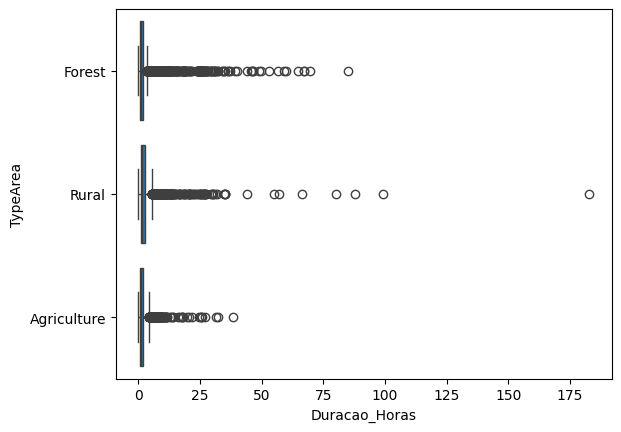

In [4]:
# make an horizontally side-by-side boxplot of the 'TypeArea' and the 'Duracao_horas' columns
sns.boxplot(y='TypeArea', x='Duracao_Horas', data=dataset)
plt.show()

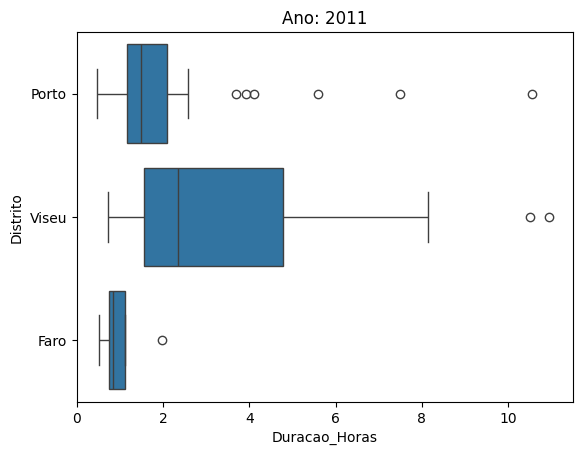

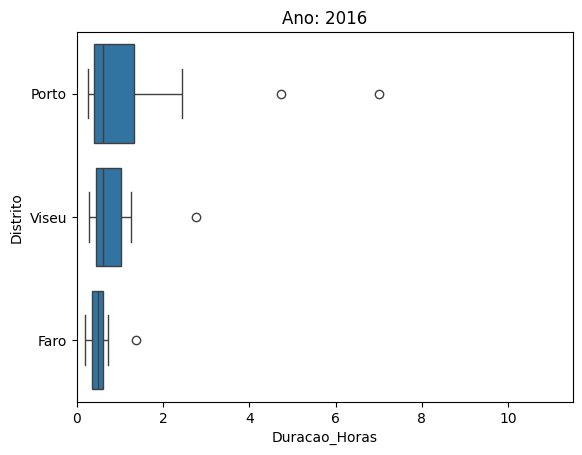

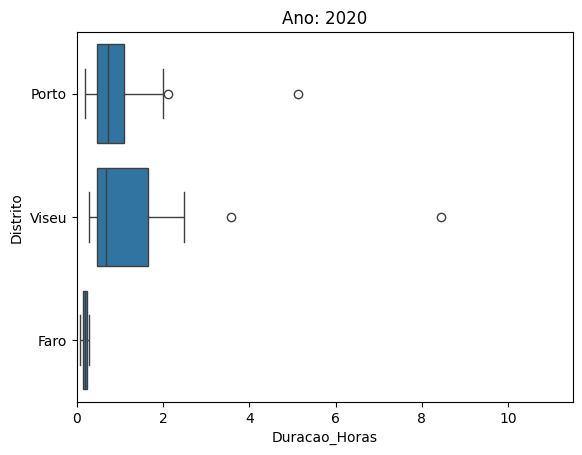

In [5]:
# make horizontal boxplots of the 'Duracao_Horas' column for each year
sample_size = 60

x_limit = dataset['Duracao_Horas'].max()
coefficient = 1.05

datasets_ano = []
x_limit = 0

for ano in dataset['Ano'].unique():
    datasets_ano.append(dataset[dataset['Ano'] == ano].sample(sample_size, random_state=999))
    x_limit = max(x_limit, datasets_ano[-1]['Duracao_Horas'].max())
    
for data in datasets_ano:
    sns.boxplot(y='Distrito', x='Duracao_Horas', data=data, order=['Porto', 'Viseu', 'Faro'])
    plt.xlim(0, x_limit * coefficient)
    plt.title(f'Ano: {data["Ano"].iloc[0]}')
    plt.show()

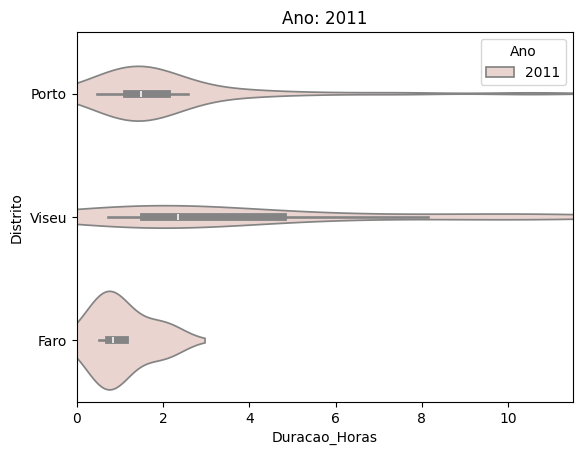

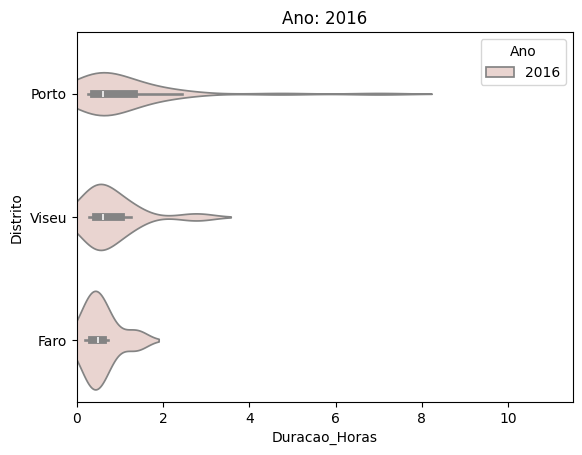

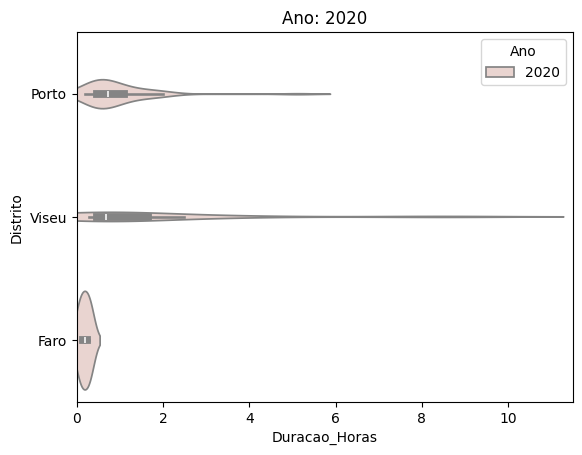

In [6]:
# make violin plots
for data in datasets_ano:
    sns.violinplot(y='Distrito', x='Duracao_Horas', data=data, hue='Ano', order=['Porto', 'Viseu', 'Faro'])
    plt.xlim(0, x_limit * coefficient)
    plt.title(f'Ano: {data["Ano"].iloc[0]}')
    plt.show()

**(just saying facts, probably delete later)**

We observe that throughout the years the average duration of the wildfires across all regions seems to go down.
Also, we observe that the average and the median values are very small. This means most of the fires are short, but it also means that all the fires that last a few hours are extreme outliers that have a huge impact on the mean.

In [95]:
years = [2011, 2016, 2020]
districts = ['Porto', 'Viseu', 'Faro']

datasets_years = {}

for year in years:
    d = []
    for district in districts:
        d.append(dataset[(dataset['Ano'] == year) & (dataset['Distrito'] == district)].sample(sample_size, random_state=999))
    
    datasets_years[year] = d

### **Perform ANOVA**

We will perform an ANOVA test to check if the average duration of the wildfires is the same across all regions.

We start by checking the conditions for the ANOVA test: normality and independence.

#### **Independence**

Since the data is from random samples, this condition is satisfied. We can move on to the normality test.

#### **Normality**

Given that the sample size is large (> 50) and less than 10% the population, we can assume that the data is normally distributed.

#### **Constant Variance**

To check the constant variance, we will perform a Levene test.

##### **Levene Test**

The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

The null hypothesis is that the data has equal variance. The alternative hypothesis is that the data does not have equal variance.

In [98]:
# perform the Levene test for homogeneity of variances
from scipy.stats import levene

alpha = 0.05

for year, data in datasets_years.items():
    statistic, p_value = levene(data[0]['Duracao_Horas'], data[1]['Duracao_Horas'], data[2]['Duracao_Horas'])
    
    print(f'Year: {year}')
    print(f'Statistic: {statistic}, P-Value: {p_value}')
    
    if p_value < alpha:
        print('The variances are not homogeneous')
    else:
        print('The variances are homogeneous')
    
    print()

Year: 2011
Statistic: 0.9381795356044323, P-Value: 0.39327678426981416
The variances are homogeneous

Year: 2016
Statistic: 1.6299680928005178, P-Value: 0.19886287961833546
The variances are homogeneous

Year: 2020
Statistic: 1.5659893605016686, P-Value: 0.21176126836361883
The variances are homogeneous



So, we conclude that the data has equal variance.

In [99]:
# perform anova test on the 'Duracao_Horas' column
from scipy.stats import f_oneway

for year, data in datasets_years.items():
    statistic, p_value = f_oneway(data[0]['Duracao_Horas'], data[1]['Duracao_Horas'], data[2]['Duracao_Horas'])
    
    print(f'Year: {year}')
    print(f'Statistic: {statistic}, P-Value: {p_value}')
    
    if p_value < alpha:
        print('There is a significant difference between the means')
    else:
        print('There is no significant difference between the means')
    
    print()

Year: 2011
Statistic: 1.3527956108848065, P-Value: 0.26117607520566644
There is no significant difference between the means

Year: 2016
Statistic: 3.3138779014169155, P-Value: 0.03864489876149626
There is a significant difference between the means

Year: 2020
Statistic: 1.7367363111426548, P-Value: 0.1790813609332703
There is no significant difference between the means



After conducting the ANOVA tests with a significance level of 1%, we observe that the null hypothesis is rejected in the years 2016 and 2020, which means that the average duration of the wildfires is not the same across all regions in those years. 

In 2011, we failed to reject the null hypothesis, which means that we cannot say that the average duration of the wildfires is different across all regions in that year.

### **Perform Kruskal-Wallis Test**

Since the data is not normally distributed, we will perform a Kruskal-Wallis test to check if the average duration of the wildfires is the same across all regions.

The Kruskal-Wallis test is a non-parametric test that is used to determine whether there are statistically significant differences between the medians of three or more independent groups.

The null hypothesis of the Kruskal-Wallis test is that the medians of the groups are equal. The alternative hypothesis is that at least one of the group medians is different from the others.

We will use a significance level of 0.05.

In [83]:
# perform Kruskal-Wallis test to compare the median of 'Duracao_Horas' through the years
from scipy.stats import kruskal

# Filter Duracao_Horas for each Distrito
data_porto = dataset[dataset['Distrito'] == 'Porto'].sample(sample_size, random_state=999)['Duracao_Horas']
data_viseu = dataset[dataset['Distrito'] == 'Viseu'].sample(sample_size, random_state=999)['Duracao_Horas']
data_faro = dataset[dataset['Distrito'] == 'Faro'].sample(sample_size, random_state=999)['Duracao_Horas']

h_stat, p_value = kruskal(data_porto, data_viseu, data_faro)

print('statistic:', h_stat)
print('p_value:', p_value)

if p_value < 0.05:
    print('\nReject the null hypothesis')
else:
    print('\nFail to reject the null hypothesis')

statistic: 30.229235656140467
p_value: 2.727751989444313e-07

Reject the null hypothesis


### **Difference between two means**

In [84]:
from math import sqrt
from scipy.stats import t

def hypothesis_test_two_means(alpha, mean1, mean2, sd1, sd2, n1, n2, two_sided = True):
    """
    Performs a hypothesis test for the difference between two means.
    Args:
        alpha (float): Significance level.
        mean1 (float): Sample mean for group 1.
        mean2 (float): Sample mean for group 2.
        sd1 (float): Sample standard deviation for group 1.
        sd2 (float): Sample standard deviation for group 2.
        n1 (int): Sample size for group 1.
        n2 (int): Sample size for group 2.
        two_sided (bool, optional): Whether to perform a two-sided test. Defaults to True.
    Returns:
        float: The calculated p-value.
    """
    
    standard_error = sqrt((sd1**2/n1) + (sd2**2/n2))
    statistic = (mean1 - mean2) / standard_error
        
    st = abs(statistic)
    
    n = min(n1, n2)
    p_value = (2 * (1 - t.cdf(st, n - 1))) if (two_sided) else (1 - t.cdf(st, n - 1))
        
    return statistic, p_value

In [85]:
alpha = 0.01

before_2017 = dataset[dataset['Ano'] < 2017].sample(sample_size, random_state=999)['Duracao_Horas']
after_2017 = dataset[dataset['Ano'] >= 2017].sample(sample_size, random_state=999)['Duracao_Horas']

before_2017_mean = before_2017.mean()
after_2017_mean = after_2017.mean()

before_2017_sd = before_2017.std()
after_2017_sd = after_2017.std()

n1 = len(before_2017)
n2 = len(after_2017)

statistic, p_value = hypothesis_test_two_means(0.05, before_2017_mean, after_2017_mean, before_2017_sd, after_2017_sd, n1, n2, two_sided = True)

print(f'statistic: {statistic}')
print(f'p-value: {p_value}')
    
if p_value < 0.05:
    print('\nReject null hypothesis')
else:
    print('\nFail to reject null hypothesis')

statistic: 3.5553020423892066
p-value: 0.0007512697169249627

Reject null hypothesis


In [86]:
# compute the confidence interval for the difference between the means
def confidence_interval_two_means(mean1, mean2, sd1, sd2, n1, n2, alpha):
    """
    Computes the confidence interval for the difference between two means.
    Args:
        mean1 (float): Sample mean for group 1.
        mean2 (float): Sample mean for group 2.
        sd1 (float): Sample standard deviation for group 1.
        sd2 (float): Sample standard deviation for group 2.
        n1 (int): Sample size for group 1.
        n2 (int): Sample size for group 2.
        alpha (float): Significance level.
    Returns:
        tuple: The lower and upper bounds of the confidence interval.
    """
    
    standard_error = sqrt((sd1**2/n1) + (sd2**2/n2))
    margin_error = t.ppf(1 - alpha/2, min(n1, n2) - 1) * standard_error
    
    lower_bound = (mean1 - mean2) - margin_error
    upper_bound = (mean1 - mean2) + margin_error
    
    return lower_bound, upper_bound

In [87]:
# compute the confidence interval for the difference between the means
lower_bound, upper_bound = confidence_interval_two_means(before_2017_mean, after_2017_mean, before_2017_sd, after_2017_sd, n1, n2, alpha)

print(f'Confidence Interval: [{round(lower_bound, 4)}, {round(upper_bound, 4)}]')

Confidence Interval: [0.2721, 1.8934]


This confidence interval indicates, with 99% confidence, that the difference in average wildfire duration between the periods before and after 2017 is between 0.27 and 1.89 hours. Since both values in the interval are positive, we can conclude that the average duration of wildfires was significantly higher before 2017 compared to after 2017, representing a decrease in wildfire duration after 2017.